# Linear Regression using Gradient Descent

### How does the number of rooms affect the property value in the Boston Housing Market?


---


![alt text](https://www.boston.gov/sites/default/files/styles/resp_wide_2000x460custom_boston_wide_1x/public/topic-intro-image-06-2017/housing1.jpg?itok=ESqBCA8q&timestamp=1498743043)

## Importing Modules and Data:
First, we need to import the necessary Python modules:

*   Numpy
*   Pandas
*   Matplotlib
*   Seaborn

Then, we import the Boston Housing Dataset. I found it on Github, posted by https://github.com/jbrownlee/ . Check him out for a good dataset repository!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!wget -c https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv

--2019-02-01 23:34:45--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



The Boston Housing Dataset was created in 1978 by Harrison, D. and Rubinfeld, D.L. and published in 1993. According to the dataset's description, it "concerns housing values in suburbs of Boston." There are 506 instances in this dataset with 14 attributes each:

1. **CRIM:** per capita crime rate by town
2. **ZN:** proportion of residential land zoned for lots over 25,000 sq.ft.
3. **INDUS:** proportion of non-retail business acres per town
4. **CHAS:**  Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. **NOX:** nitric oxides concentration (parts per 10 million)
6. **RM:** average number of rooms per dwelling
7. **AGE:** proportion of owner-occupied units built prior to 1940
8. **DIS:** weighted distances to five Boston employment centres
9. **RAD:** index of accessibility to radial highways
10. **TAX:** full-value property-tax rate per 10000 Dollar
11. **PTRATIO:**  pupil-teacher ratio by town
12. **B:** 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. **LSTAT:** % lower status of the population
14. **MEDV:** Median value of owner-occupied homes in $1000's

Let's look at the first few entries in the dataset using Pandas:

In [2]:
data = pd.read_csv("./housing.csv", names=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"])
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Analyzing the Data for Correlation:
Before we can start fitting a linear function, we first need to find two attributes in the dataset which have a strong linear correlation! We find this correlation using the Pandas module and the *Pearson correlation coefficient*:
https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

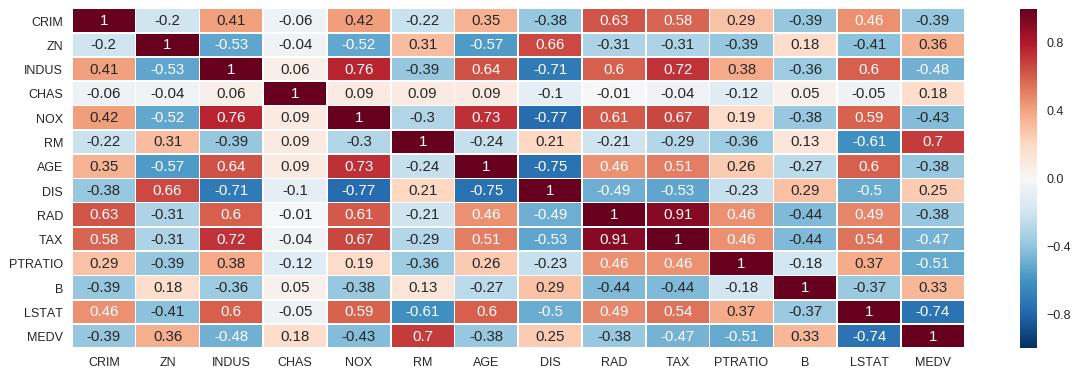

In [3]:
correlation_coeff = data.corr().round(2)

#Display the correlation between two attributes with a Seaborn/Matplotlib Heatmap:
plt.figure(figsize = (16,5), dpi=90)
sns.heatmap(correlation_coeff, linewidth=0.5, annot = True)
plt.show()

As you can see there is a pretty strong linear correlation between **Rooms per Dwelling** and the median property value **MEDV**. So let's focus on these two attributes for the linear model: 

## Preparing the Data:
The last step before fitting the linear model to our data is preparing the data for our needs: We'll read the data using  Numpy and store all instances of **Rooms per Dwelling** (rm) and **Median Property Value** (medv) in two Numpy arrays:

In [0]:
rm = np.genfromtxt("./housing.csv", delimiter = ",", usecols = 5)
medv = np.genfromtxt("./housing.csv", delimiter = ",", usecols = 13)

## Training:

These are the functions we'll use for fitting the linear function to our data. In the code, I'll use b for θ₀ and m for θ₁. Thank you to Andrew Ng for his Linear Regression Formula Cheat Sheet:

![alt text](https://chrisjmccormick.files.wordpress.com/2014/03/gradientdescentofmsetable.png)

In [5]:
#We look for the linear function f(x)=mx+b with optimal parameters m and b

n = len(rm)         #number of instances in the dataset
m,b = 0,0           #initilaize m and b to 0


#This function calculates the cost function given the current m and b values
def cost_function(m, b):
  squared_loss = 0
  
  #For each element in the dataset
  for i in range(n):
    #Add the squared loss
    squared_loss += (m * rm[i] + b - medv[i]) **2
    
  return squared_loss / float(2*n) #return the mean squared loss


#Computes the gradient for m and b
def gradient(m, b):
  sum_m, sum_b = 0, 0
  
  for i in range(n):
    sum_m += (m * rm[i] + b - medv[i]) * rm[i]
    
  for i in range(n):
    sum_b += (m * rm[i] + b - medv[i])
    
  m_deriv = sum_m / float(n)
  b_deriv = sum_b / float(n)
  
  return m_deriv, b_deriv

#Updates m and b according to their gradient and the learning rate
def update_m_and_b(m, b, learning_rate):
  
  grad_a, grad_b = gradient(m, b)
  
  #For new m and b go a tiny step opposite its gradient
  m_new = m - learning_rate * grad_a
  b_new = b - learning_rate * grad_b
  
  return m_new, b_new

#iteratively applies gradient descent to m and b
def gradient_descent(m,b,learning_rate, number_of_iterations): 
  
  for i in range(number_of_iterations):
    m,b = update_m_and_b(m, b, learning_rate)
  
  return m,b


#compute the optimal values for m and b so that f(x) fits the datapoints
m,b = gradient_descent(m, b, 0.04, 10000)

#Print out the (near) optimal error for the final m and b
print("The error for m={0} and b={1} equals {2}".format(m.round(2), b.round(2), cost_function(m,b).round(2)))

The error for m=9.06 and b=-34.38 equals 21.8


We did it! We optimized m and b using Gradient Descent to fit the linear function modeling the linear correlation between the Rooms per Dwelling and the Median Property Value in the Boston Housing Market of 1978!


---


Let's plot our function using Numpy to validate our result:

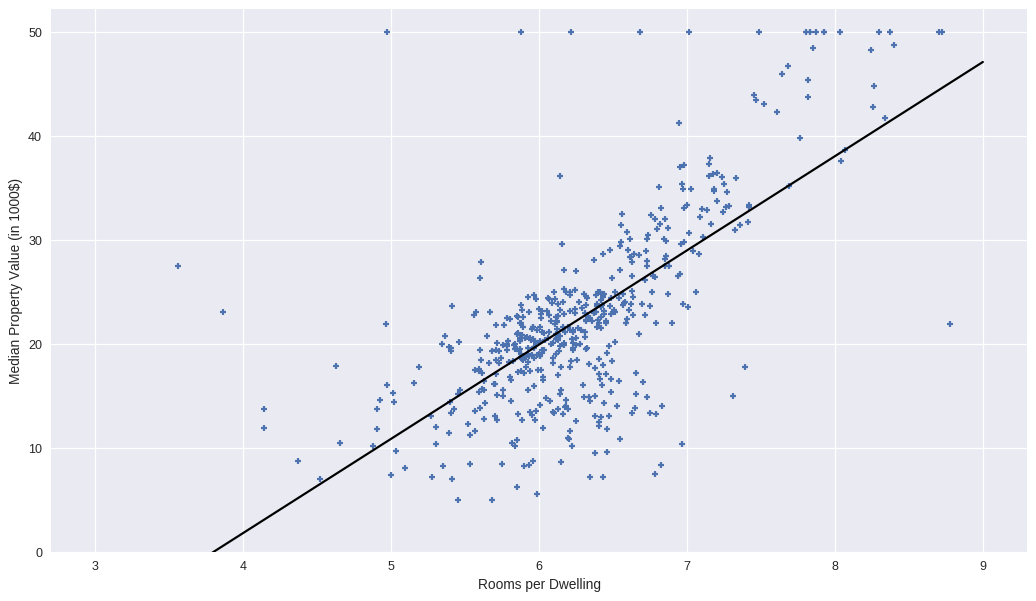

In [6]:
#The range in the dataset from 3 to 9 rooms on average
x = np.array([3,4,5,6,7,8,9])

plt.figure(figsize = (14,8), dpi=90)
plt.ylabel("Median Property Value (in 1000$)")
plt.scatter(rm, medv, s = 20, marker = "+")
plt.ylim(bottom = 0)
plt.xlabel("Rooms per Dwelling")
plt.plot(x, m*x+b, color = "black")
plt.show()